Total number of images: 23708


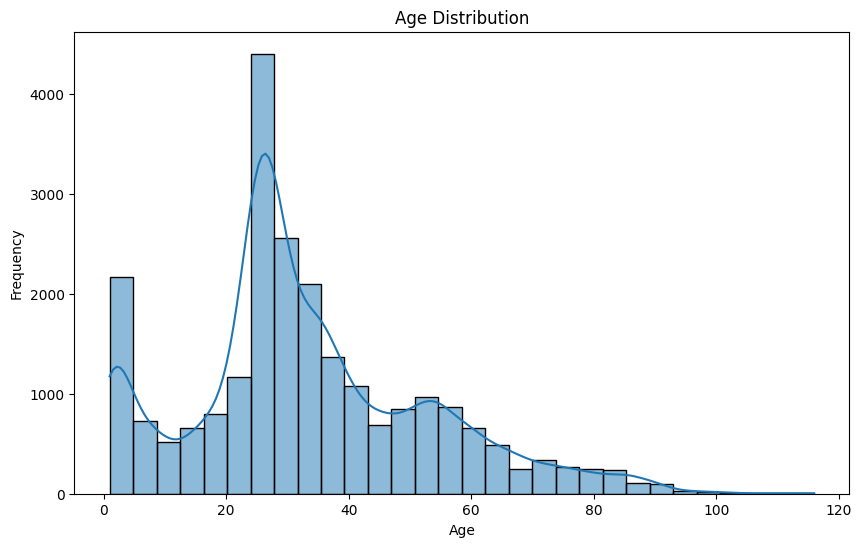

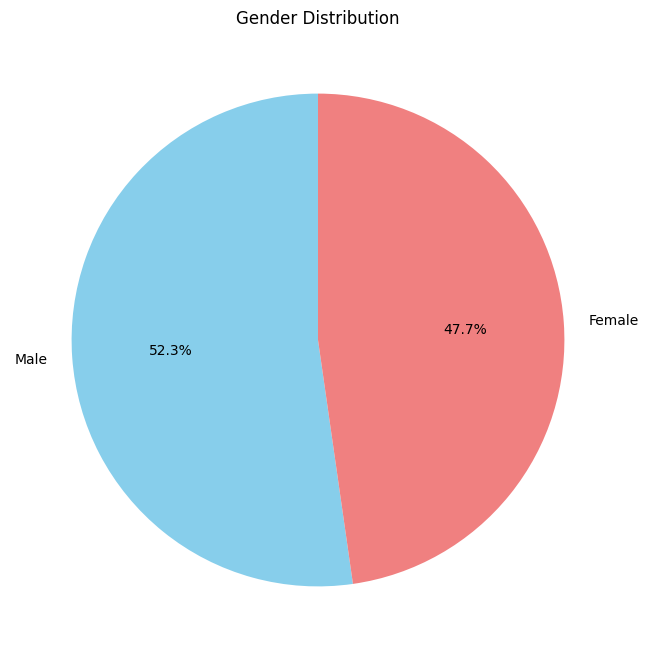

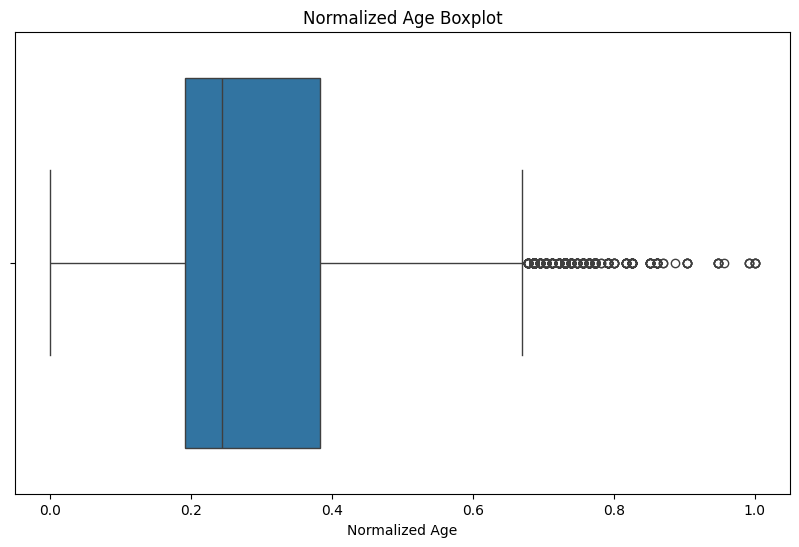

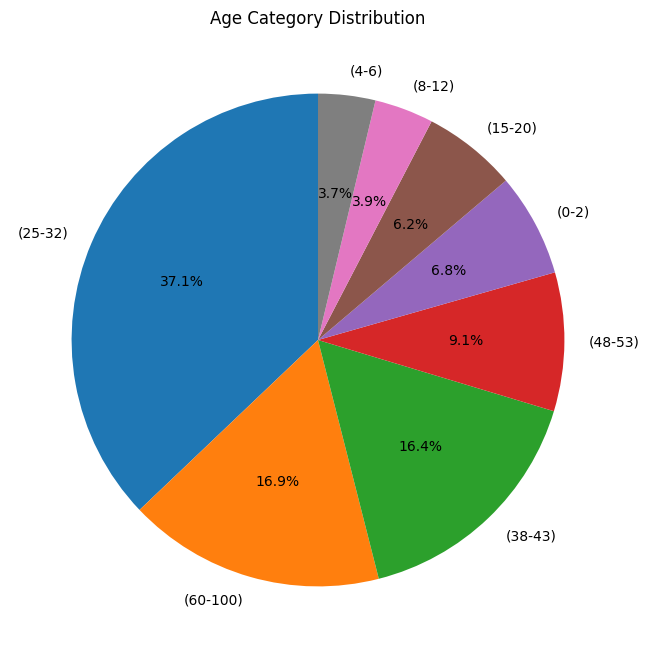

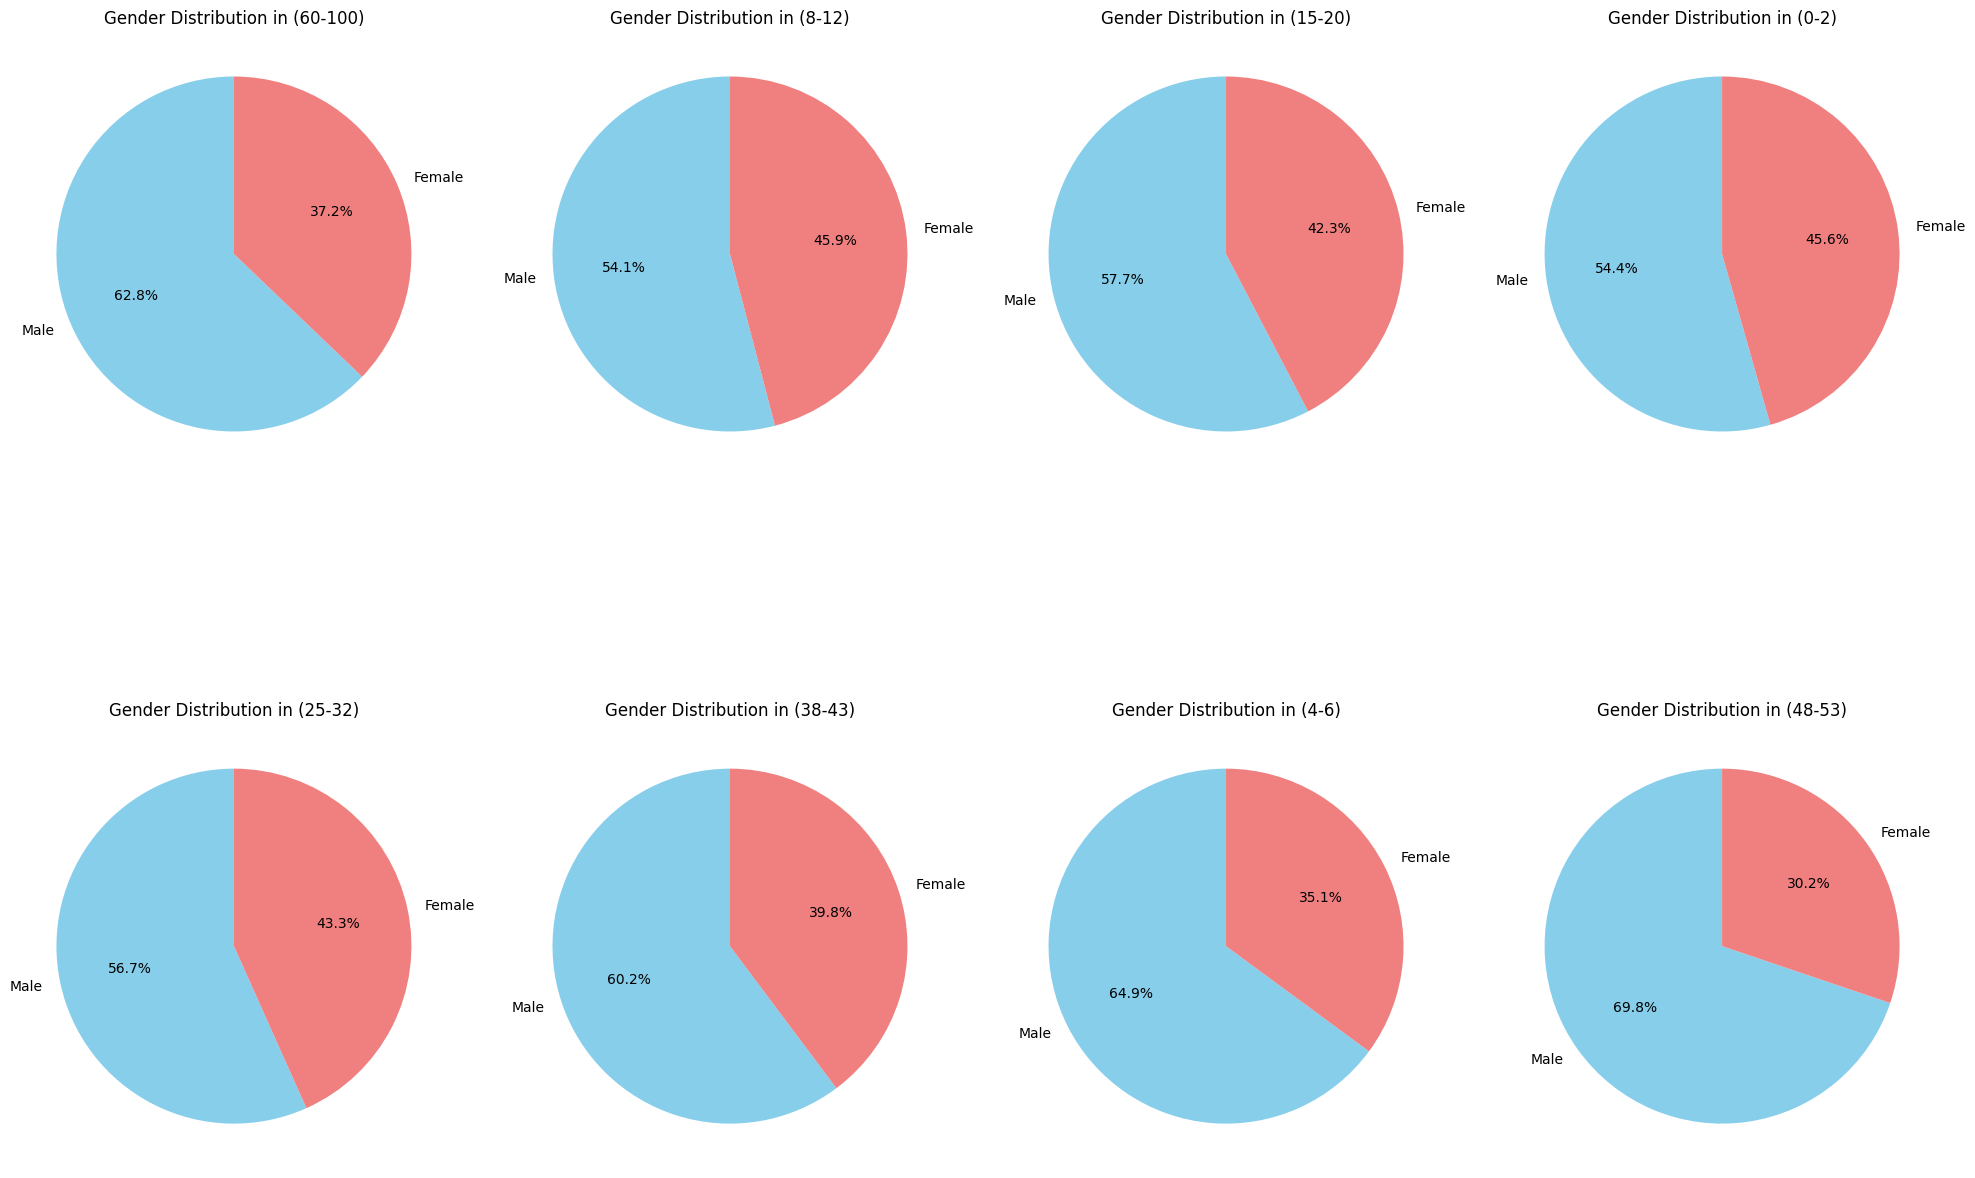

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ...existing code...

def read_utkface_data(directory):
    ages = []
    genders = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            age, gender, _ = filename.split("_")[:3]
            ages.append(int(age))
            genders.append(int(gender))
    return ages, genders

def count_images(directory):
    return len([filename for filename in os.listdir(directory) if filename.endswith(".jpg")])

def plot_age_distribution(ages):
    plt.figure(figsize=(10, 6))
    sns.histplot(ages, bins=30, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

def plot_gender_pie_chart(genders):
    plt.figure(figsize=(8, 8))
    gender_counts = pd.Series(genders).value_counts()
    gender_counts.index = ['Male', 'Female']
    gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    plt.title('Gender Distribution')
    plt.ylabel('')
    plt.show()

def normalize_ages(ages):
    min_age = min(ages)
    max_age = max(ages)
    normalized_ages = [(age - min_age) / (max_age - min_age) for age in ages]
    return normalized_ages

def plot_age_boxplot(ages):
    normalized_ages = normalize_ages(ages)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=normalized_ages)
    plt.title('Normalized Age Boxplot')
    plt.xlabel('Normalized Age')
    plt.show()

def categorize_age(age):
    if age <= 2:
        return "(0-2)"
    elif age <= 6:
        return "(4-6)"
    elif age <= 12:
        return "(8-12)"
    elif age <= 20:
        return "(15-20)"
    elif age <= 32:
        return "(25-32)"
    elif age <= 43:
        return "(38-43)"
    elif age <= 53:
        return "(48-53)"
    else:
        return "(60-100)"

def plot_age_category_pie_chart(ages):
    age_categories = [categorize_age(age) for age in ages]
    plt.figure(figsize=(10, 8))
    age_category_counts = pd.Series(age_categories).value_counts()
    age_category_counts.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Age Category Distribution')
    plt.ylabel('')
    plt.show()

def plot_gender_distribution_by_age_category(ages, genders):
    age_categories = [categorize_age(age) for age in ages]
    data = pd.DataFrame({'Age Category': age_categories, 'Gender': genders})
    unique_categories = data['Age Category'].unique()
    num_categories = len(unique_categories)
    num_rows = 2
    num_cols = (num_categories + 1) // 2
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))
    axes = axes.flatten()
    
    for ax, category in zip(axes, unique_categories):
        gender_counts = data[data['Age Category'] == category]['Gender'].value_counts()
        gender_counts.index = ['Male', 'Female']
        gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], ax=ax)
        ax.set_title(f'Gender Distribution in {category}')
        ax.set_ylabel('')
    
    for i in range(len(unique_categories), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    directory = 'dataset/UTKFace'
    ages, genders = read_utkface_data(directory)
    
    print(f"Total number of images: {count_images(directory)}")
    
    plot_age_distribution(ages)
    plot_gender_pie_chart(genders)
    plot_age_boxplot(ages)
    plot_age_category_pie_chart(ages)
    plot_gender_distribution_by_age_category(ages, genders)
